# Predicting Diabetes

## 1. Import Liabraries

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn

## 2. Load and Review Data

In [50]:
df = pd.read_csv("./data/pima-data.csv")

In [51]:
df.shape

(768, 10)

### Definition of features
From the metadata on the data source we have the following definition of the features.

| Feature  | Description | Comments |
|--------------|-------------|--------|
| num_preg     | number of pregnancies         |
| glucose_conc | Plasma glucose concentration a 2 hours in an oral glucose tolerance test         |
| diastolic_bp | Diastolic blood pressure (mm Hg) |
| thickness | Triceps skin fold thickness (mm) |
|insulin | 2-Hour serum insulin (mu U/ml) |
| bmi |  Body mass index (weight in kg/(height in m)^2) |
| diab_pred |  Diabetes pedigree function |
| Age (years) | Age (years)|
| skin | ???? | What is this? |
| diabetes | Class variable (1=True, 0=False) |  Why is our data boolean (True/False)? |

## 3. Mold Data

### 3.1  Check null and type

In [52]:
df.isnull().values.any()

False

In [53]:
diabetes_map = {True: 1, False: 0}
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [54]:
df

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,1.8912,0
764,2,122,70,27,0,36.8,0.340,27,1.0638,0
765,5,121,72,23,112,26.2,0.245,30,0.9062,0
766,1,126,60,0,0,30.1,0.349,47,0.0000,1


### 3.2  any strong correlation?

In [55]:
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.xticks(range(len(corr.columns)), corr.columns)

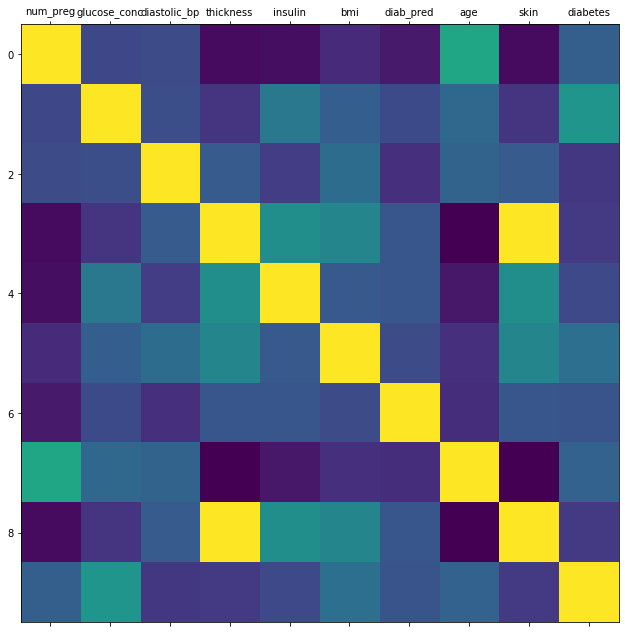

In [56]:
plot_corr(df)

In [57]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [58]:
del df['skin']

###  3.3 split train set and test set

In [59]:
from sklearn.model_selection import train_test_split
feature_name = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin','bmi', 'diab_pred', 'age']
predicted_name = ['diabetes']

X = df[feature_name].values
Y = df[predicted_name].values
split_test_size = 0.30

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = split_test_size, random_state = 10)

In [60]:
print("{0:0.2f}% in traning set".format(len(x_train)/len(df.index) * 100))

69.92% in traning set


###  3.4 any missing value?

In [61]:
len(df.loc[df['thickness'] == 0])

227

In [62]:
from sklearn.impute import SimpleImputer

fill_0 = SimpleImputer(missing_values=0, strategy="mean")
x_train = fill_0.fit_transform(x_train)
x_test = fill_0.fit_transform(x_test)

## 4. Select initial algorithem & Train the model


In [64]:
from sklearn.naive_bayes import GaussianNB
diabetes_model = GaussianNB()
diabetes_model.fit(x_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

## 5. Evaluate perfomance


In [65]:
y_predict_GaNB = diabetes_model.predict(x_test)

from sklearn import metrics

print("GaussianNB Accuracy: {0: .4f}".format(metrics.accuracy_score(y_test, y_predict_GaNB)))

GaussianNB Accuracy:  0.7316


In [66]:
print("confusion metrics")
print("{0}".format(metrics.confusion_matrix(y_test, y_predict_GaNB)))

confusion metrics
[[122  22]
 [ 40  47]]


In [67]:
from collections import Counter
Counter(y_test.ravel())
Counter(y_predict.ravel())

Counter({0: 162, 1: 69})

## 6. Improve Perfomance

## 6.1 Change algorithm

### 6.1.1 Change algorithm - Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state = 42)
random_forest_model.fit(x_train, y_train.ravel())
y_predict_RF = random_forest_model.predict(x_test)
print("Random Forest accuracy: {0: .4f}".format(metrics.accuracy_score(y_test, y_predict_RF)))

Random Forest accuracy:  0.7619


### 6.1.2 Change algorithm - Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(C=0.7, random_state=42, solver='liblinear', max_iter=10000)
logistic_regression_model.fit(x_train, y_train.ravel())
y_predict_LR = logistic_regression_model.predict(x_test)
print("Logistic Regression accuracy: {0: .4f}".format(metrics.accuracy_score(y_test, y_predict_LR)))

Logistic Regression accuracy:  0.7273


## 6.2 Fixing issues: Adjust hyperparameters

### 6.2.1 Overfitting - Regularization hyperparameter

1st max value of 0.494 occured at C=3.000


Text(0, 0.5, 'recall rate')

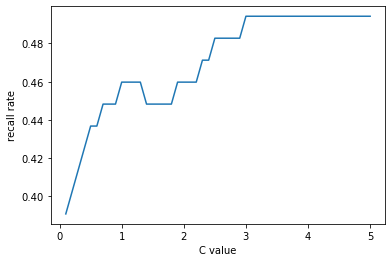

In [75]:
C_END = 5.0
C_ITER = 0.1
C_values, recall_rates = [], []
C_value = 0.1
best_recall_rate = 0
while(C_value < C_END):
    C_values.append(C_value)
    LR_model = LogisticRegression(C = C_value, random_state=42, solver='liblinear')
    LR_model.fit(x_train, y_train.ravel())
    y_predict_LRLoop = LR_model.predict(x_test)
    recall_rate = metrics.recall_score(y_test, y_predict_LRLoop)
    recall_rates.append(recall_rate)
    if(recall_rate > best_recall_rate):
        best_recall_rate = recall_rate
        best_C_value = C_value   
    C_value += C_ITER
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_rate, best_C_value))
%matplotlib inline 
plt.plot(C_values, recall_rates, "-")
plt.xlabel("C value")
plt.ylabel("recall rate")

### 6.2.2 Inbalance - Balance hyperparameter

1st max value of 0.747 occured at C=0.500


Text(0, 0.5, 'recall rate')

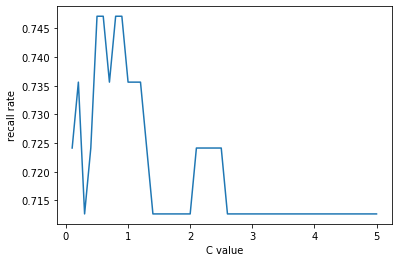

In [78]:
C_END = 5.0
C_ITER = 0.1
C_values, recall_rates = [], []
C_value = 0.1
best_recall_rate = 0
while(C_value < C_END):
    C_values.append(C_value)
    LR_model = LogisticRegression(C = C_value, random_state=42, class_weight="balanced", solver='liblinear')
    LR_model.fit(x_train, y_train.ravel())
    y_predict_LRLoop = LR_model.predict(x_test)
    recall_rate = metrics.recall_score(y_test, y_predict_LRLoop)
    recall_rates.append(recall_rate)
    if(recall_rate > best_recall_rate):
        best_recall_rate = recall_rate
        best_C_value = C_value   
    C_value += C_ITER
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_rate, best_C_value))
%matplotlib inline 
plt.plot(C_values, recall_rates, "-")
plt.xlabel("C value")
plt.ylabel("recall rate")

## 6.3 Cross Validation

### 6.3.1 K-fold  cross-validation

In [81]:
from sklearn.linear_model import LogisticRegressionCV
logistic_regreesion_CV_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced", max_iter=500)
logistic_regreesion_CV_model.fit(x_train, y_train.ravel())

y_predict_LR_CV = logistic_regreesion_CV_model.predict(x_test)
print("Logistic Regression with K-fold CV accuracy: {0: .4f}".format(metrics.accuracy_score(y_test, y_predict_LR_CV)))
print("Logistic Regression with K-fold CV recall rate: {0: .4f}".format(metrics.recall_score(y_test, y_predict_LR_CV)))

Logistic Regression with K-fold CV accuracy:  0.7316
Logistic Regression with K-fold CV recall rate:  0.6667
